<a href="https://colab.research.google.com/github/ssanchezgoe/viu_aprendizaje_supervisado/blob/main/tema4/aprendizaje_supervisado_tema4_modelo_regresion_version_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from math import sqrt

from pprint import pprint

from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')


In [3]:
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
# Regresión lineal Simple
df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

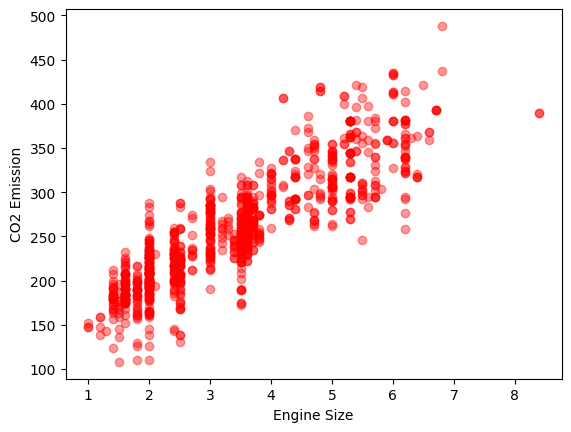

In [11]:
#plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X, y,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

In [12]:
# Dividir 0.2 test y fijar semilla aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f'Max X_train {X_train.max()}, Min X_train {X_train.min()}')

Max X_train 8.4, Min X_train 1.0


In [14]:
# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

In [15]:
print(f'Max X_train {X_train.max()}, Min X_train {X_train.min()}')

Max X_train 3.565562698402933, Min X_train -1.6682740684588393


In [16]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'R2' : 'r2',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [17]:
# Regresión lineal
# Definimos un algoritmo LR de regresión
algorithm = LinearRegression(fit_intercept=True)

In [18]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!!
results = cross_validate(algorithm, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.07019567, 0.00175595, 0.01035213, 0.00153661, 0.00180531]),
 'score_time': array([0.00643921, 0.00177121, 0.00172472, 0.01830912, 0.01296377]),
 'test_MAE': array([-21.94876355, -24.07325637, -24.00223808, -24.2710429 ,
       -22.05830724]),
 'test_MAPE': array([-8.75467615, -9.45453047, -9.35492369, -9.87187494, -9.05335148]),
 'test_MSE': array([ -872.60382485, -1041.39082822,  -894.60155776, -1050.49239628,
        -854.37718339]),
 'test_R2': array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554]),
 'test_RMSE': array([-29.5398684 , -32.27058766, -29.90989063, -32.41130044,
       -29.22973115])}


In [20]:
# Definimos un algoritmo regresion lineal de regresión candidato
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)

In [22]:
# MAE en el conjunto de test
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)

print(f'Test results (R2) {r_squared}')

Test results (R2) 0.7615595731934373


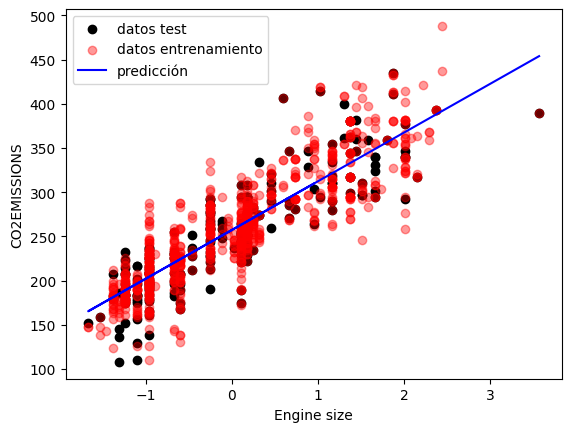

In [23]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'CO2EMISSIONS')
plt.show()

In [27]:
#w_1
model.coef_

array([55.13126515])

In [28]:
# w_0
model.intercept_

257.2567409144197

In [24]:
# Guardar modelo
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [25]:
ls

finalized_model.sav  sample_data/


In [26]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7615595731934373


In [29]:
# KNN Regresion
# Definimos un algoritmo SVM de regresión
algorithm = KNeighborsRegressor(n_neighbors=10, weights='distance')

In [30]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!!
results = cross_validate(algorithm, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.0033226 , 0.00117755, 0.00098228, 0.00158596, 0.00059438]),
 'score_time': array([0.00333834, 0.00432038, 0.00287294, 0.00194573, 0.00176215]),
 'test_MAE': array([-21.77749805, -22.76369628, -22.44787213, -22.09975957,
       -21.95211951]),
 'test_MAPE': array([-8.81053034, -9.03275703, -8.6862022 , -9.17912846, -8.86922371]),
 'test_MSE': array([-820.05660445, -911.56454891, -796.66587579, -923.59377068,
       -828.45382693]),
 'test_R2': array([0.74164074, 0.77530519, 0.80751803, 0.79697411, 0.78520669]),
 'test_RMSE': array([-28.63663047, -30.19212727, -28.22527016, -30.39068559,
       -28.78287385])}


In [38]:
# K-Vecinos
knn = KNeighborsRegressor(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1, weights='distance')

In [33]:
# MAE en el conjunto de test
y_pred = knn.predict(X_test)
r_squared = r2_score(y_test, y_pred)

print(f'Test results (R2) {r_squared}')

Test results (R2) 0.7318362985895247


¿Qué hacemos para escoger una buena pareja de hiperparametros K (numero de vecinos), 'weights' (metodo de ponderacion) y metrics (Metrica para calculo de distancias a los vecino)?

GridSearchCV:  Realiza una validación cruzada, y busca la mejor pareja de valores (k, weights, metric)

In [34]:
# GridSearch
# Parameters
hyperparameters = {'n_neighbors':np.arange(1,15), 'weights':('uniform', 'distance'), 'metric':('euclidean', 'cosine', 'manhattan')}
reg = KNeighborsRegressor()

model = GridSearchCV(reg, hyperparameters, scoring='r2')

model.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ('euclidean', 'cosine', 'manhattan'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ('uniform', 'distance')},
             scoring='r2')

In [35]:
print("Mejor conjunto de parámetros:")
print()
print(model.best_params_)
print()
print("Media y desviación:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Mejor conjunto de parámetros:

{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}

Media y desviación:

0.599 (+/-0.148) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.599 (+/-0.148) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.681 (+/-0.073) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.681 (+/-0.072) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.729 (+/-0.043) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.729 (+/-0.042) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.764 (+/-0.043) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.759 (+/-0.054) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.765 (+/-0.064) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.761 (+/-0.069) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.768 (+/-0.067) for {'metr

In [36]:
model.best_estimator_

KNeighborsRegressor(metric='euclidean', n_neighbors=12)

In [37]:
model.best_params_

{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}

In [ ]:
# Regresion Lineal Múltiple

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

X = df[['engine-size','curb-weight']]
y = df['price']

In [ ]:
# Dividir 0.2 test y fijar semilla aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

In [ ]:
# Definimos un algoritmo SVM de regresión candidato
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)

In [ ]:
# MAE en el conjunto de test
y_pred = model.predict(X_test)
r2_metric = r2_score(y_test, y_pred)

print(f'Test results (MAE) {r2_metric}')


#### Regresión Ridge
<p><a name="ridge"></a></p>

En éste típo de algorítmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.



Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [ ]:
df.dropna(inplace=True)
X = df[['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']]
y = df['price']

In [ ]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)

#modelo OLS
linearM  = LinearRegression()
linearM.fit(X_train,y_train)
print('R2 OLS =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

#Modelo Ridge
print(5*'#')
ridge  = Ridge(alpha=1)
ridge.fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

In [ ]:
plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

Vemos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo.

El modelo se hace robusto a variaciones de los predictores, pero puerde un poco de precisión (se necesitan más datos para entrenamiento)

En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.

#### Regresión Lasso
<p><a name="lasso"></a></p>

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

In [ ]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=100)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

In [ ]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [ ]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

#### Redes elásticas

Como vimos anteriormente, podemos generar penalizaciones a las regresiones lineales haciendo cambios en su metrica de error.

Para la regresión Ridge se penaliza con: $\alpha \sum w_i^2$ (penalidad $L_2$), mientras que para Lasso se tiene que:
$\alpha \sum |w_i|$ (penalidad $L_1$). Cada una de ellas tenía sus pro y sus contra. Pero es posible hacer una combinación de ambos metodos.

A las regresiones que usan una combinación de ambas penalidades se les conoce como **ElasticNet** (Redes elásticas) y definimos su error como:
$$\sum (Y_i- \hat Y_i)^2+\alpha \rho \sum |w_i| + \frac{\alpha(1-\rho)}{2}\sum w_i^2. $$

Note que cuando $ \rho=1$ tenemos la regresión Lasso, y con $\rho=0$ tendremos la de Ridge, por tanto en las redes elásticas $0\leq \rho\leq1$.

Hemos dado un paso más en la complejización del modelo ya que ahora debemos preocuparnos por el ajuste de 2 hiperparámetros para seleccionar el mejor modelo.

Para usar las redes elásticas en sklearn debemos importar la función 'ElasticNet' del modulo de modelos lineales.

In [ ]:
from sklearn.linear_model import ElasticNet

En la implementación de sklearn tenemos los hiperparámetros 'alpha' y 'l1_ratio' ($\rho$ en nuestra ecuación), con ellos controlaremos el comportamiento del regresor.

Tenga en cuenta que para valores de *l1_ratio* $\leq0.01$ el algoritmo de sklearn no es estable si usamos el valor de $\alpha$ por defecto y se hace necesario que nosotros mísmos ajustemos el valor.

In [ ]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

df.dropna(inplace=True)

X = df['ENGINESIZE'].values.reshape(-1,1)
y = df['CO2EMISSIONS'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

# Estandarización de los datos de entrenamiento y test
std_scaling = preprocessing.StandardScaler()

X_train = std_scaling.fit_transform(X_train)
X_test = std_scaling.transform(X_test)


#entrenamos el modelo
elastic = ElasticNet(alpha=0.01,l1_ratio=1)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='best')
plt.xlabel(r'Engine size')
plt.ylabel(r'Price')
plt.show()

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', elastic.score(X_test,y_test))

De nuevo, los hiperparámetros debemos seleccionarlos con una busqueda para determinar una buena combinación.